<img style="display: block; margin: 0 auto;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiSyjHy6taItD_71ma3iHUxETxKC3KhGwR7Q&s" width="1000" height="500"/>

## **BOOTCAMP QUALIFICATION PROJECT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


## **IMPORT LIBRARIES**

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

## **DATA**

In [5]:
dataPath = "/content/drive/MyDrive/MyData"

train_data = pd.read_csv(f"{dataPath}/Train Dataset .csv")
test_data = pd.read_csv(f"{dataPath}/Test Dataset.csv")

train_data.columns = [col.lower() for col in train_data.columns]
test_data.columns = [col.lower() for col in test_data.columns]

In [6]:
train_data.shape, test_data.shape

((7303, 15), (2697, 14))

In [7]:
train_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [9]:
train_data.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
print(f"No of missing values in Train data: {train_data.isnull().sum().sum()}")
print(f"No of missing values in Test data: {test_data.isnull().sum().sum()}")

No of missing values in Train data: 0
No of missing values in Test data: 0


In [11]:
train_data["target"].value_counts(normalize = True)

,proportion
target,
1,0.813501
0,0.186499


## **MODEL TRAINING**

In [12]:
model_random_forest = RandomForestClassifier(n_estimators = 600, max_depth = 15, min_samples_split = 7,
                                 min_samples_leaf = 3, max_features = None,  bootstrap =True, random_state = 42)

feat_imp_random_forest = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'ca']

model_random_forest.fit(train_data[feat_imp_random_forest], train_data['target'])

predictions_random_forest = model_random_forest.predict(test_data[feat_imp_random_forest])

In [13]:
model_light_gbm = lgb.LGBMClassifier(n_estimators = 1000, max_depth = 3, learning_rate = 0.2476,
                colsample_bytree = 0.7, reg_alpha = 4.349 , random_state = 2024, verbosity=-1)

features_light_gbm = ['cp', 'chol', 'thalach', 'exang', 'ca']

model_light_gbm.fit(train_data[features_light_gbm], train_data['target'])

prediction_light_gbm = model_light_gbm.predict(test_data[features_light_gbm])

In [ ]:
model_light_cat = CatBoostClassifier(iterations=420, depth = 10, learning_rate = 0.101786,
                           l2_leaf_reg = 78.541, random_strength = 7.614,
                            random_seed = 2024, verbose = False)

features_light_cat = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'ca']

model_light_cat.fit(train_data[features_light_cat], train_data['target'])

prediction_light_cat = model_light_cat.predict(test_data[features_light_cat])

In [ ]:
## Voting with the three Models

vote = np.where((prediction_light_gbm+prediction_light_cat+predictions_random_forest)>=2, 1, 0)

## **Leaderboard Submission**

In [ ]:
submit_file = pd.DataFrame()
submit_file['Id'] = test_data['id']
submit_file['target'] = vote

submit_file.to_csv('solution_1-(vote).csv', index=False)

submit_file['target'] = prediction_light_cat
submit_file.to_csv('solution_2-(Catboost).csv', index=False)

In [ ]:
submit_file

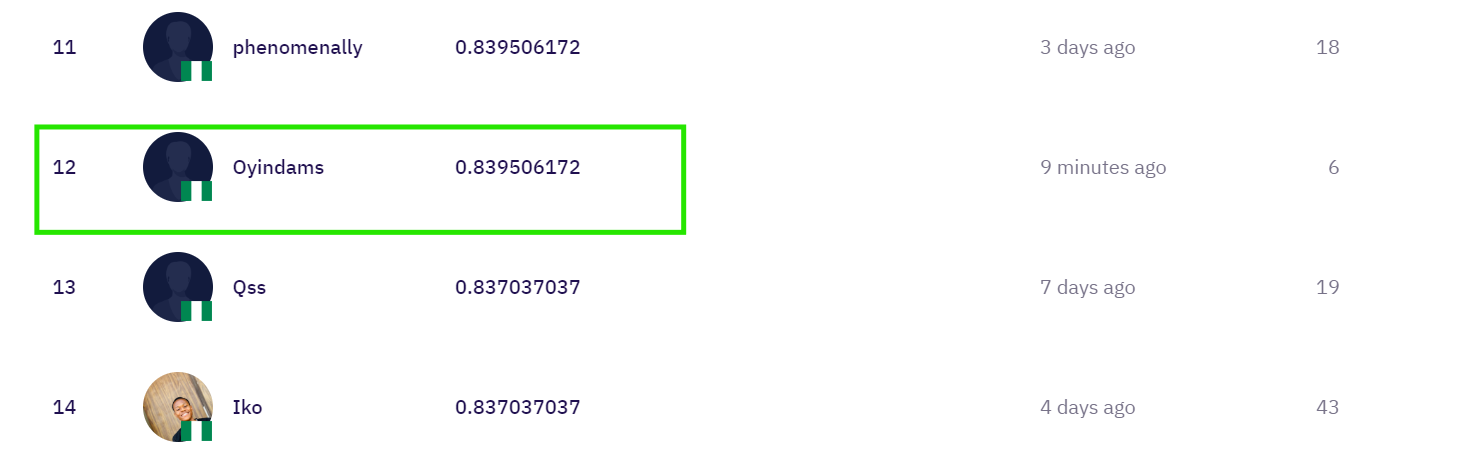